# Salary Prediction with ML Models - ⚾Baseball 

![](https://images.unsplash.com/photo-1591444539769-2518e73d1090?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8OXx8fGVufDB8fHx8&w=1000&q=80)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>TABLE OF CONTENTS </strong></center></h1>
</div>
 
##### [1.Description](#Description)
    
##### [2.Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Importing Libraries](#importing_libraries)<br>
* [Reading in a dataset](#reading_in_a_dataset)<br>
* [Categorical and Numerical Variable Analysis](#categorical_and_numerical_variable_analysis)<br>
* [Correlation](#correlation)<br>

##### [3.Data Processing and Feature Engineering](#Data_Processing_and_Feature_Engineering)
* [Missing Values](#missing_values)
* [Outliers](#Outliers)
* [New Variables](#New_Variables)

##### [4.Modeling](#Modeling)
* [Hyperparameter Optimization with RandomSearchCV](#Hyperparameter_Optimization_with_RandomSearchCV)
* [RandomForest](#Hyperparameter_Optimization_with_RandomSearchCV)
* [DecisionTree](#Hyperparameter_Optimization_with_RandomSearchCV)
* [KNeighbors](#Hyperparameter_Optimization_with_RandomSearchCV)
* [XGB](#Hyperparameter_Optimization_with_RandomSearchCV)
* [GradientBoosting](#Hyperparameter_Optimization_with_RandomSearchCV)
* [LightGBM](#lightgbm_model)
* [Ridge](#lightgbm_model)
* [SVR](#lightgbm_model)
* [SGD](#lightgbm_model)
* [Artficial Neural Network](#lightgbm_model)

##### [5.Summary & Results ](#Summary)
<a id="lightgbm_model"></a>

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>DESCRIPTION </strong></center></h1>
</div>
<a id="Description"></a>

<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:110%;
            text-align: left">

In this notebook, we will develop a machine learning model that can estimate the player's salary.

Before modelling , we will make the exploratory data analysis and feature engineering for its dataset.
    
### Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.
 <a id = "4"></a><br>

    
Descriptions of Variables:

* **AtBat**: Number of times at bat in 1986

* **Hits**: Number of hits in 1986

* **HmRun**: Number of home runs in 1986

* **Runs**: Number of runs in 1986

* **RBI**: Number of runs batted in in 1986

* **Walks**: Number of walks in 1986

* **Years**: Number of years in the major leagues

* **CAtBat**: Number of times at bat during his career

* **CHits**: Number of hits during his career

* **CHmRun**: Number of home runs during his career

* **CRuns**: Number of runs during his career

* **CRBI**: Number of runs batted in during his career

* **CWalks**: Number of walks during his career

* **League**: A factor with levels A and N indicating player's league at the end of 1986

* **Division**: A factor with levels E and W indicating player's division at the end of 1986

* **PutOuts**: Number of put outs in 1986

* **Assists**: Number of assists in 1986

* **Errors**: Number of errors in 1986

* **Salary**: 1987 annual salary on opening day in thousands of dollars

* **NewLeague**: A factor with levels A and N indicating player's league at the beginning of 1987

### References
Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York
 <a id = "5"></a><br>

<a id="Exploratory Data Analysis"></a>

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>EXPLORATORY DATA ANALYSIS </strong></center></h1>
</div>

<a id="Exploratory_Data_Analysis"></a>

#### Importing Libraries
<a id="importing_libraries"></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV,ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve,KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor



import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.3f' % x)


#### Reading in a dataset
<a id="reading_in_a_dataset"></a>

In [2]:
#df_copy = pd.read_csv("/kaggle/input/hitters-baseball-data/Hitters.csv")
df_copy = pd.read_csv("hitters.csv")

In [3]:
df = df_copy.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [4]:
target="Salary"

##### Checking the data

In [5]:
df.shape

(322, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
df.describe([0.01,0.25,0.75,0.99])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,263.000
mean,380.929,101.025,10.770,50.910,48.028,38.742,7.444,2648.683,717.571,69.491,358.795,330.118,260.239,288.938,106.913,8.040,535.926
std,153.405,46.455,8.709,26.024,26.167,21.639,4.926,2324.206,654.473,86.266,334.106,333.220,267.058,280.705,136.855,6.368,451.119
min,16.000,1.000,0.000,0.000,0.000,0.000,1.000,19.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,67.500
1%,20.420,4.420,0.000,1.210,2.000,1.000,1.000,41.000,9.840,0.000,3.630,4.630,4.000,0.000,0.000,0.000,70.000
25%,255.250,64.000,4.000,30.250,28.000,22.000,4.000,816.750,209.000,14.000,100.250,88.750,67.250,109.250,7.000,3.000,190.000
50%,379.500,96.000,8.000,48.000,44.000,35.000,6.000,1928.000,508.000,37.500,247.000,220.500,170.500,212.000,39.500,6.000,425.000
75%,512.000,137.000,16.000,69.000,64.750,53.000,11.000,3924.250,1059.250,90.000,526.250,426.250,339.250,325.000,166.000,11.000,750.000
99%,658.590,210.790,33.000,107.790,112.370,93.580,19.790,8749.970,2500.340,373.120,1174.370,1310.850,1139.140,1301.190,478.160,25.790,2032.887
max,687.000,238.000,40.000,130.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1378.000,492.000,32.000,2460.000


### Categorical and Numerical Variable Analysis
<a id="categorical_and_numerical_variable_analysis"></a>

In [8]:
def grab_col_names(dataframe):
    df=dataframe
    cat_th=len(dataframe)//20
    car_th=len(dataframe)//20


    # cat_cols, cat_but_car
    cat_cols_object = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols_object + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    

    dfx=pd.DataFrame(np.zeros((len(dataframe.columns), 5)),columns=["cat_cols","num_cols","cat_but_car","num_but_cat","cat_cols_object"])
    dfx.loc[:]="- - -"
    dfx.loc[0]=[len(cat_cols),len(num_cols),len(cat_but_car),len(num_but_cat),len(cat_cols_object)]
    dfx.loc[range(2,len(cat_cols)+2),"cat_cols"]=cat_cols
    dfx.loc[range(2,len(num_cols)+2),"num_cols"]=num_cols
    dfx.loc[range(2,len(cat_but_car)+2),"cat_but_car"]=cat_but_car
    dfx.loc[range(2,len(num_but_cat)+2),"num_but_cat"]=num_but_cat
    dfx.loc[range(2,len(cat_cols_object)+2),"cat_cols_object"]=cat_cols_object
    
    if len(cat_cols)>len(num_cols):
        print(dfx.iloc[:len(cat_cols)+2])
    else:
        print(dfx.iloc[:len(num_cols)+2])
    return cat_cols, num_cols, cat_but_car,cat_cols_object,dfx

cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)

     cat_cols num_cols cat_but_car num_but_cat cat_cols_object
0           3       17           0           0               3
1       - - -    - - -       - - -       - - -           - - -
2      League    AtBat       - - -       - - -          League
3    Division     Hits       - - -       - - -        Division
4   NewLeague    HmRun       - - -       - - -       NewLeague
5       - - -     Runs       - - -       - - -           - - -
6       - - -      RBI       - - -       - - -           - - -
7       - - -    Walks       - - -       - - -           - - -
8       - - -    Years       - - -       - - -           - - -
9       - - -   CAtBat       - - -       - - -           - - -
10      - - -    CHits       - - -       - - -           - - -
11      - - -   CHmRun       - - -       - - -           - - -
12      - - -    CRuns       - - -       - - -           - - -
13      - - -     CRBI       - - -       - - -           - - -
14      - - -   CWalks       - - -       - - -         

#### Visualization of Categorical Variables

In [9]:
def cat_summary2(dataframe,col_name,plot=False,
                fig_size=5,
                print_first_x_rows=10):
  
    size=fig_size
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows],
                       "Ratio": 100*dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows]/len(dataframe)}))
    
    print("-"*99)
    if plot:
        plt.rcParams['figure.figsize']=(size,size)
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)
    print("#"*99)

    
###########################################################################################################################
def cat_summary(dataframe,cat_cols,plot=True,fig_size=4,print_first_x_rows=10)  :
    if type(cat_cols)==str:
        cat_summary2(dataframe,cat_cols,plot,fig_size,print_first_x_rows)
    else:    
        for col in cat_cols:
            if dataframe[col].dtypes=="bool":
                dataframe[col]=dataframe[col].astype(int)
            cat_summary2(dataframe,col,plot,fig_size,print_first_x_rows)

   League  Ratio
A     175 54.348
N     147 45.652
---------------------------------------------------------------------------------------------------


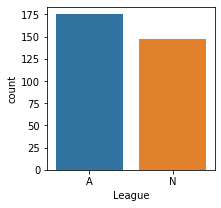

###################################################################################################
   Division  Ratio
W       165 51.242
E       157 48.758
---------------------------------------------------------------------------------------------------


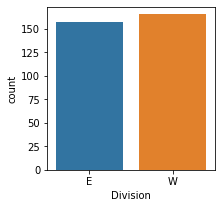

###################################################################################################
   NewLeague  Ratio
A        176 54.658
N        146 45.342
---------------------------------------------------------------------------------------------------


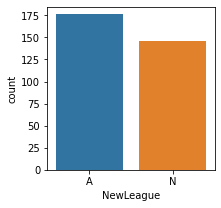

###################################################################################################


In [10]:
cat_summary(df,cat_cols,plot=True,fig_size=3,print_first_x_rows=10)

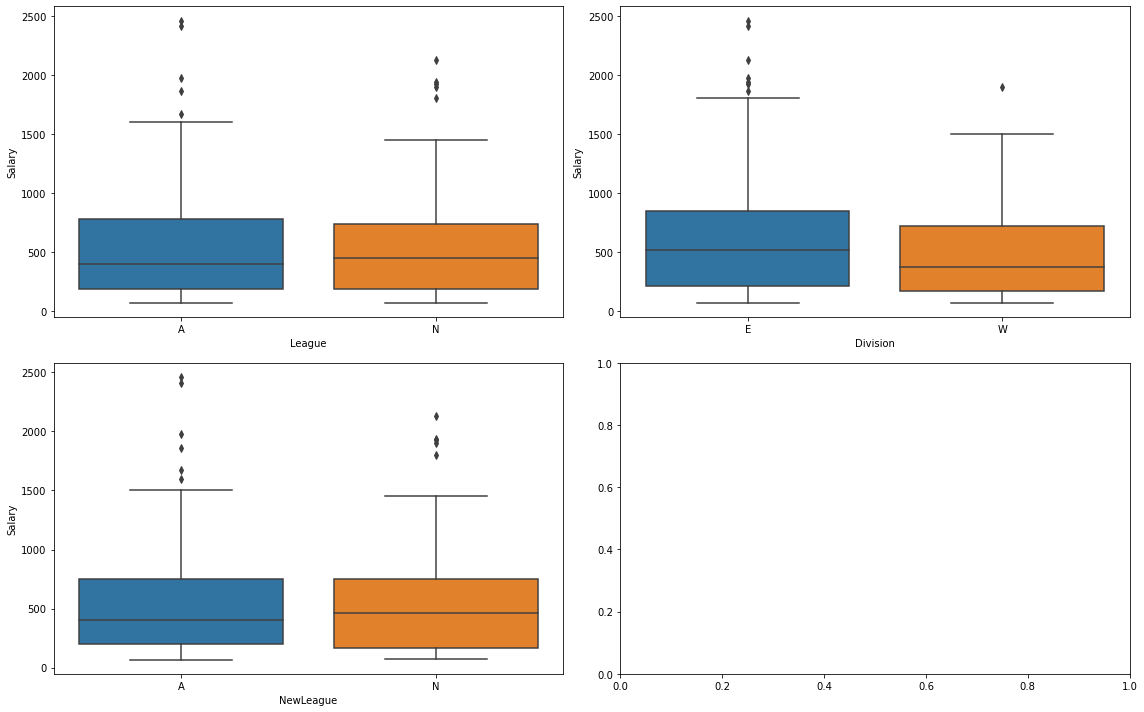

In [11]:
cat_cols = list(cat_cols)
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_cols):
            sns.boxplot(x=cat_cols[i], y=target, data=df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  

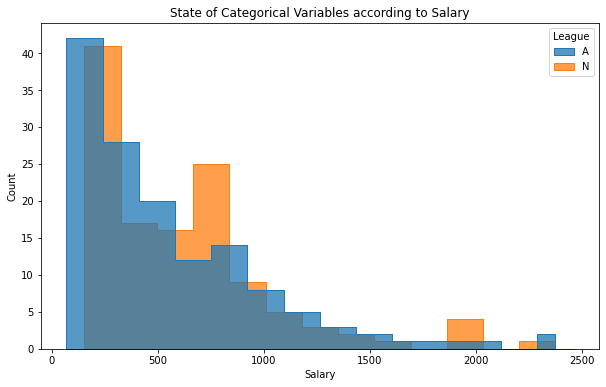

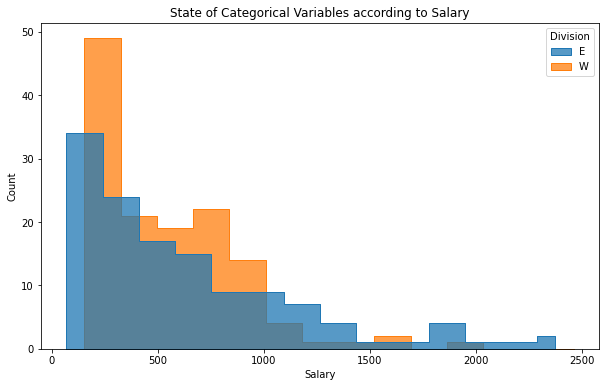

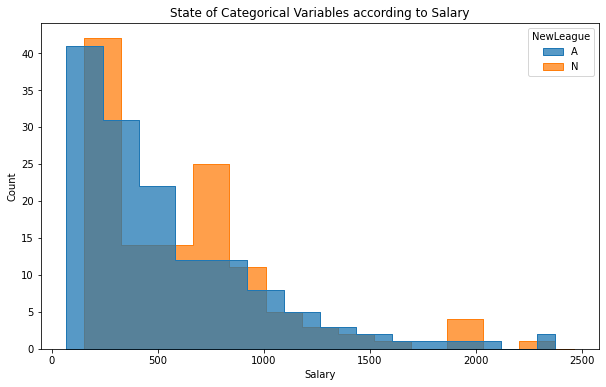

In [12]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(10,6))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Salary")
    plt.show()

for col in cat_cols:
    target_vs_category_visual(df,"Salary",col)



#### Visualization of Numerical Variables

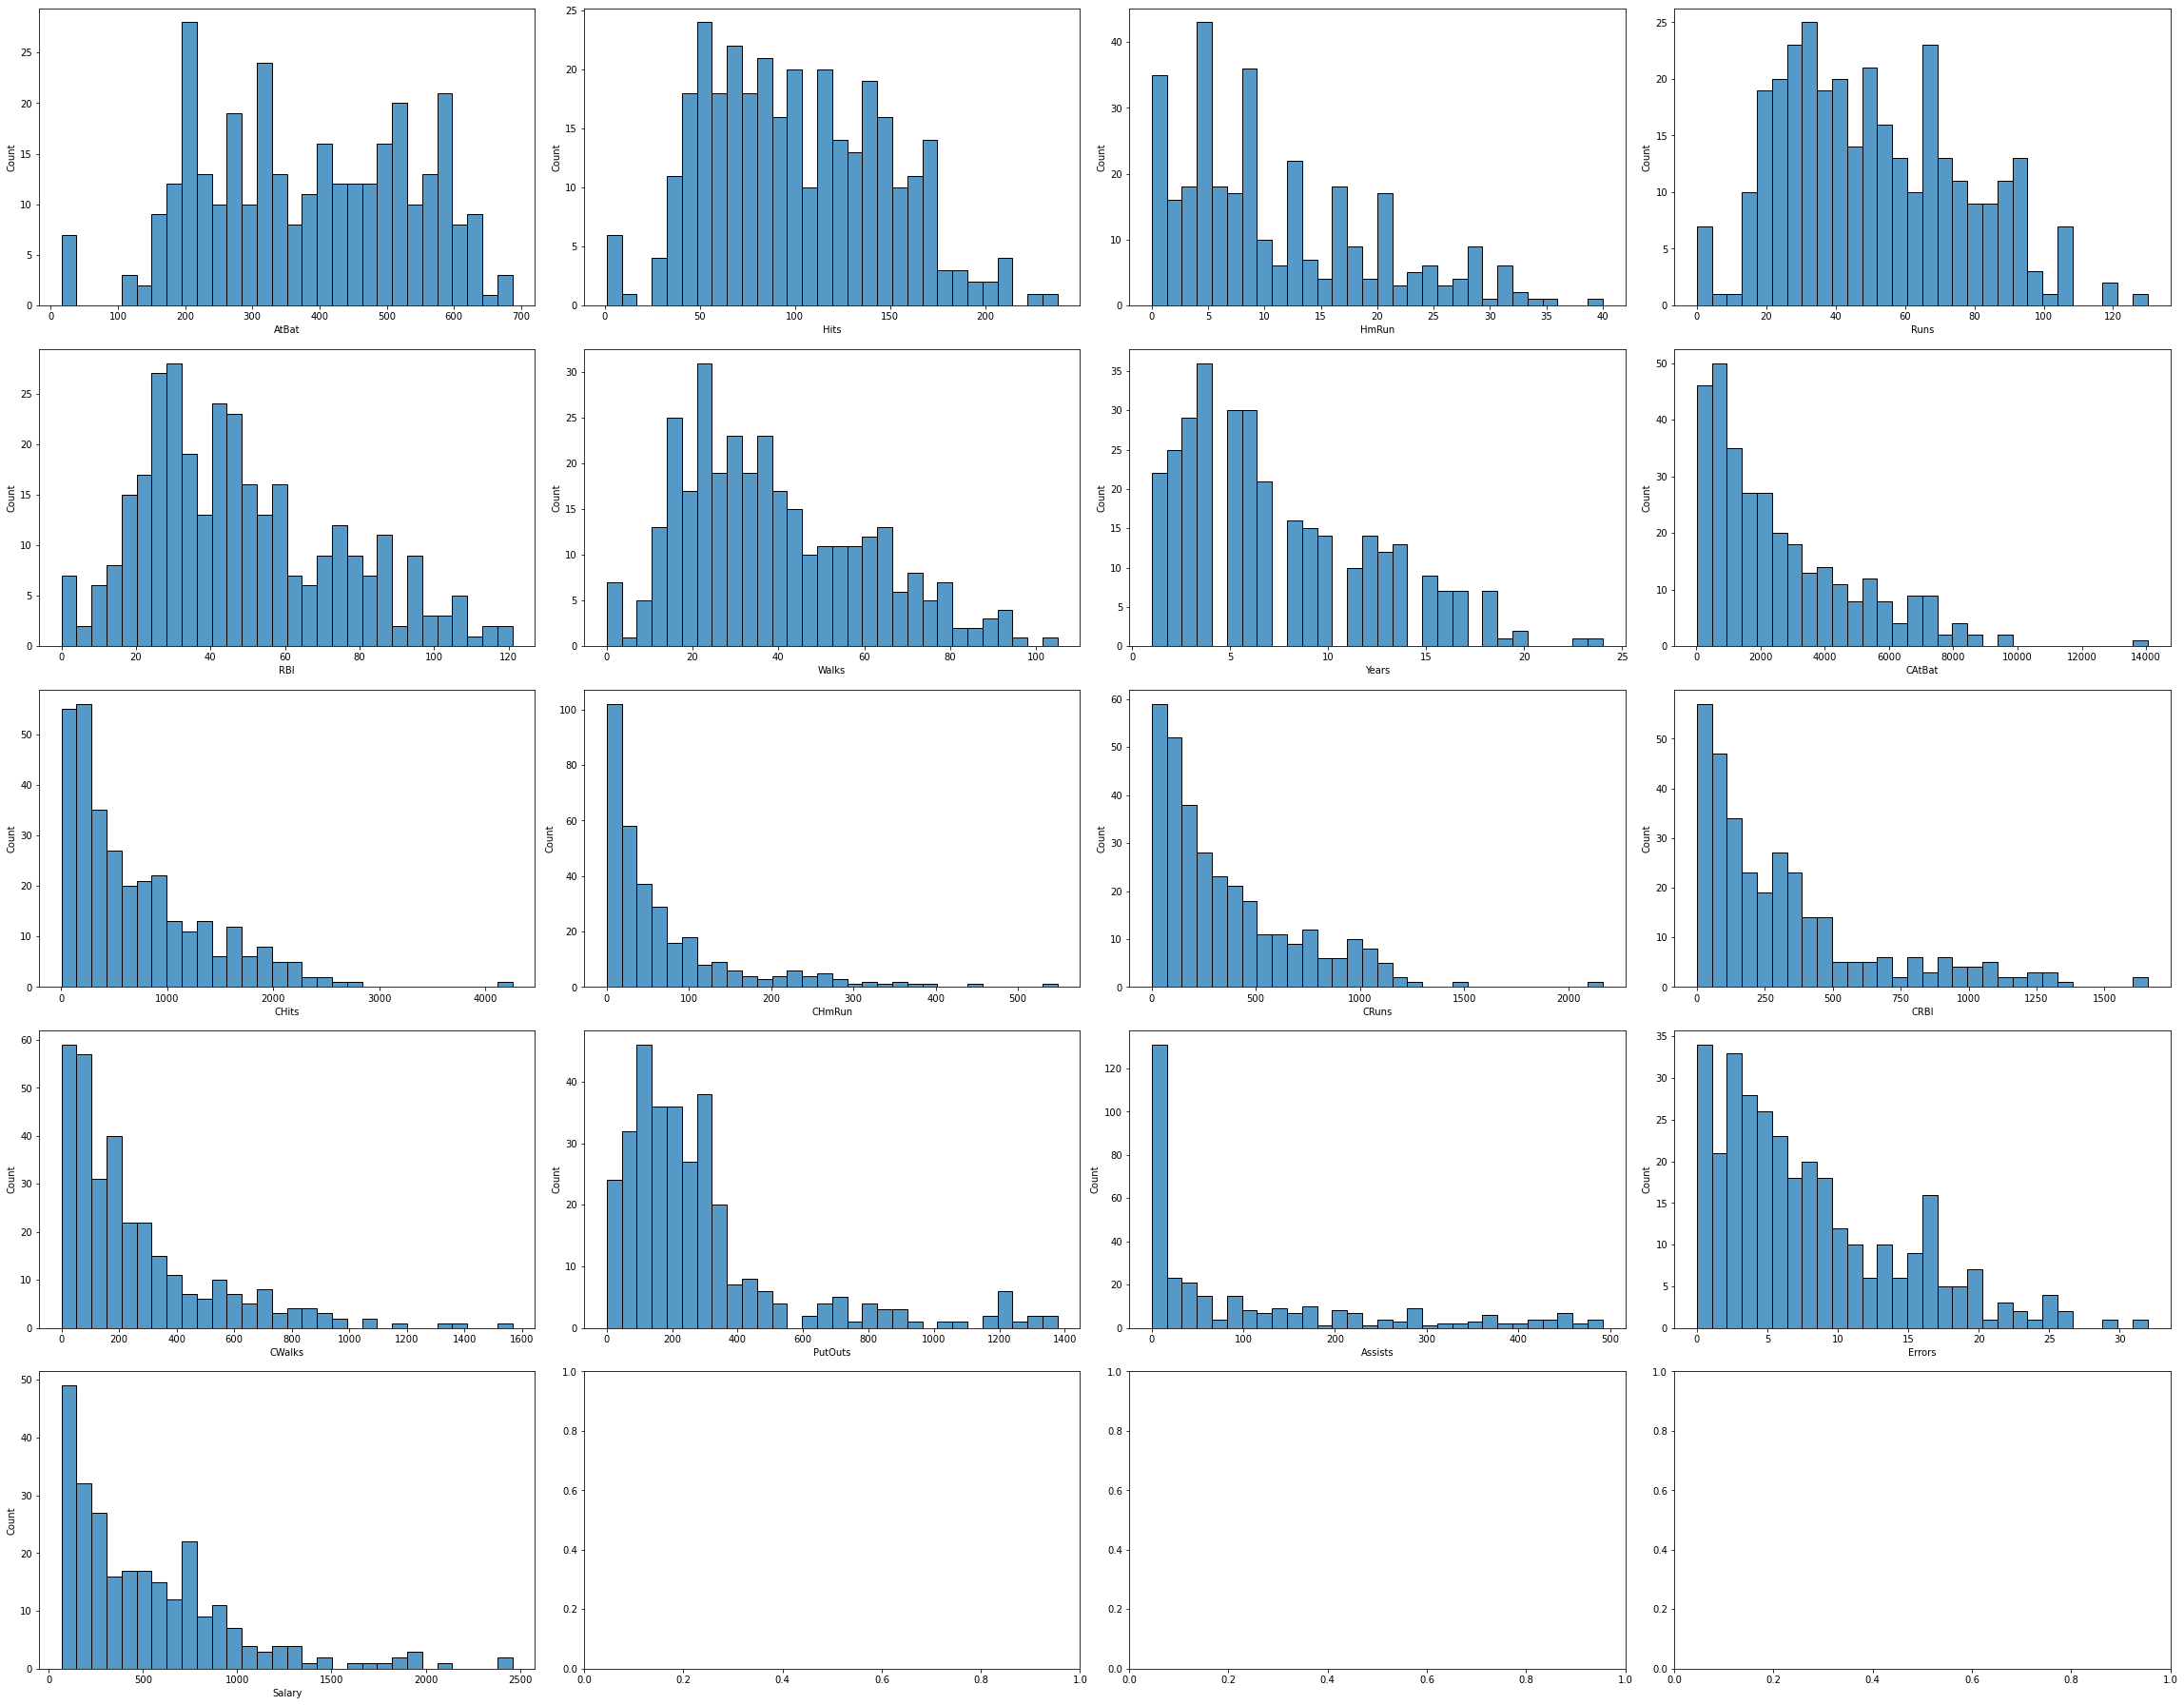

In [13]:
num_cols = list(num_cols)
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_cols):
            sns.histplot(x=num_cols[i], data=df, ax = axs[r][c], bins=30)
    
plt.tight_layout()    
plt.show()  

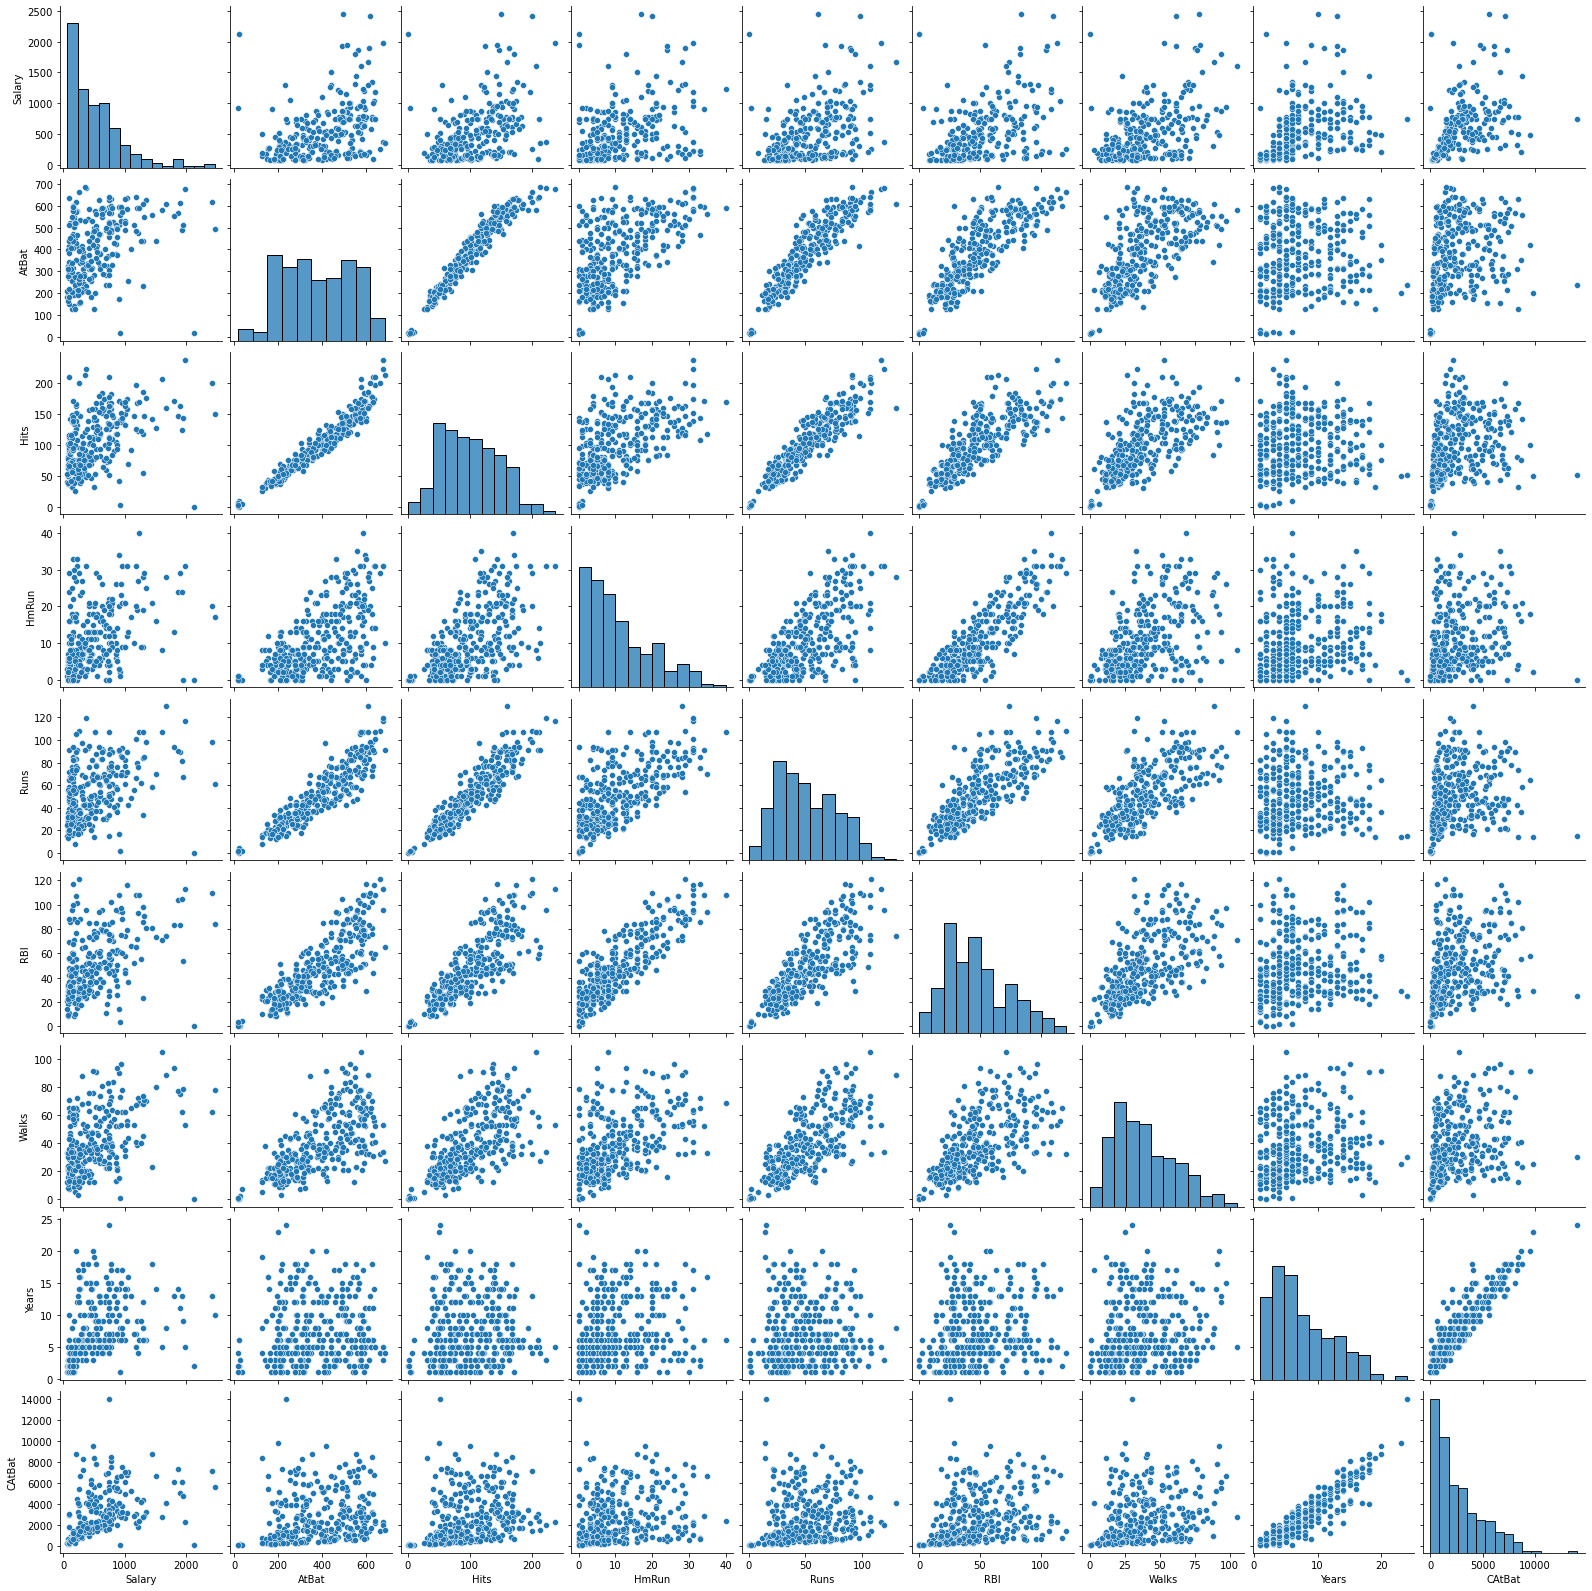

In [14]:
num_cols2=num_cols[:]
num_cols2.remove(target)
sns.pairplot(df[[target]+num_cols2[:len(num_cols2)//2]])
plt.show()

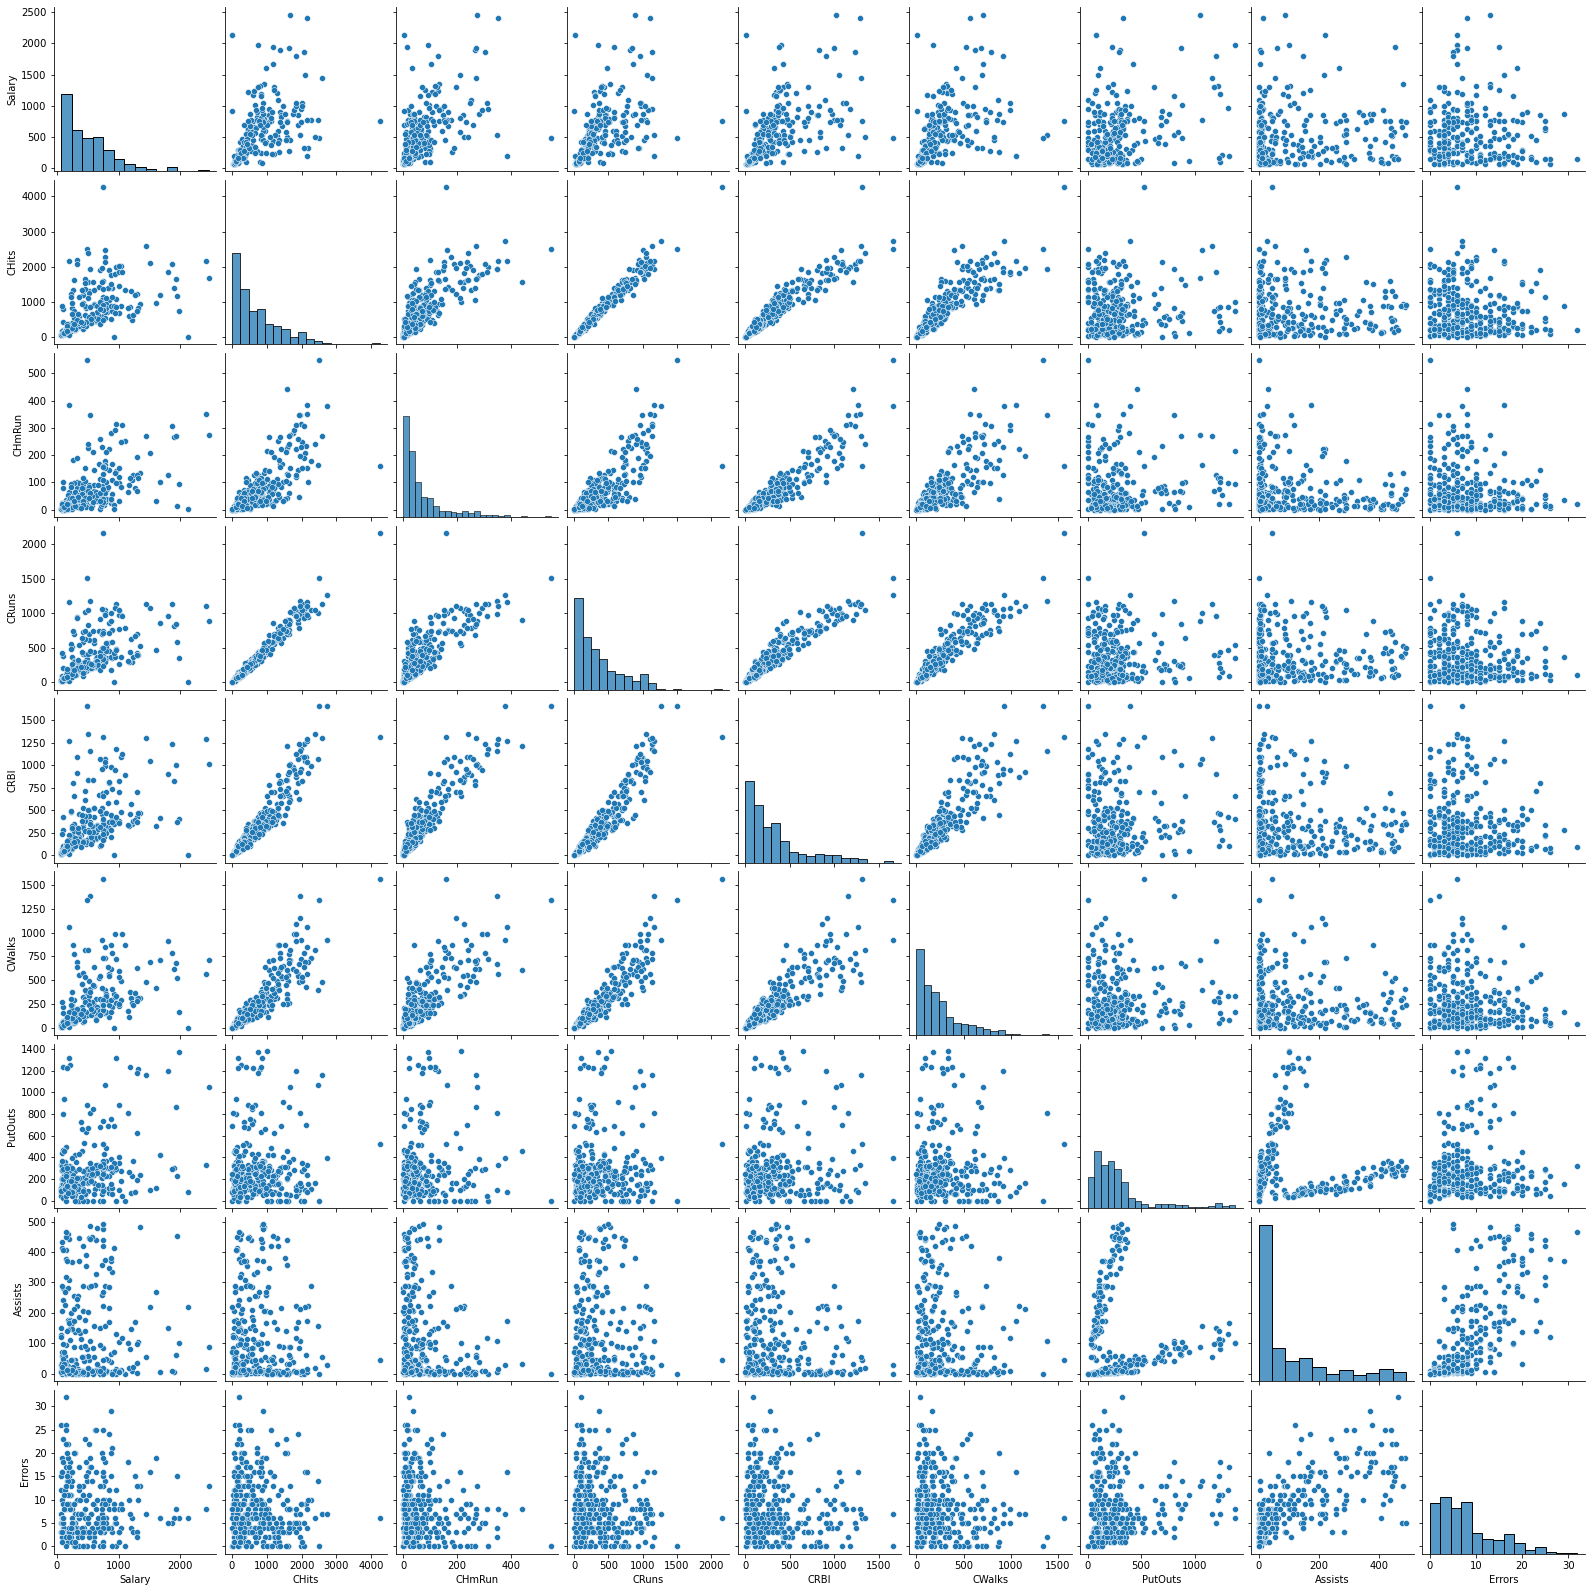

In [15]:
sns.pairplot(df[[target]+num_cols2[len(num_cols2)//2:]])
plt.show()

In [16]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),  # modes_rate
                            df[col].value_counts(dropna=False),],axis=1)  # modes_count

    col_df_modes.columns=["modes_rate","modes_count"]  # değişkenlere isimler atıyorum

    col_df_modes["modes"]=col_df_modes.index  #index te olan mode ları değişken olarak atıyorum

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["target_mean"]
    col_df_modes2["modes"]=col_df_modes2.index
    col_df_modes2  # hedef değişkene ait mean değerlerinden yeni bir df oluşturuyorum

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes") # oluşan iki df i birleştiriyorum
    col_df_modes

    # değişkenleri istediğim sıraya göre yeniden sıralıyorum
    col_df_modes=col_df_modes[["modes","target_mean","modes_rate","modes_count"]] 

    col_df_modes["dtypes"]=df[col].dtypes
    col_df_modes["col_isna_rate"]=df[col].isna().sum()/len(df)
    col_df_modes["col_notna_rate"]=df[col].notna().sum()/len(df)
    col_df_modes["nunique"]=df[col].nunique()
    col_df_modes["uniques"]=str(df[col].unique())

    return col_df_modes
# col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
# col_df_modes

def col_df_modes_all_fonk(df,col,target):
    
    col_df_modes_all=pd.DataFrame()
    for col in df.columns:
        if (df[col].nunique()<len(df)//20) and col !=target:
            col_df_modes=find_col_modes(df,col=col,target=target)
            col_df_modes["col"]=col
            col_df_modes_all=pd.concat([col_df_modes_all,col_df_modes],axis=0)
            col_df_modes_all.index=range(len(col_df_modes_all))
    
   
    
    col_df_modes_all=find_mean_to_target_mean_diff(df,col_df_modes_all,"target_mean",target)
    col_df_modes_all=col_df_modes_all[['col','modes', 'target_mean', 'target_mean_diff' , 'modes_rate', 'modes_count', 'dtypes', 'col_isna_rate', 'col_notna_rate', 'nunique', 'uniques']]
    
    return col_df_modes_all

# col_df_modes_all=col_df_modes_all_fonk(df,col=cat_cols[0],target=target)
# col_df_modes_all



def find_mean_to_target_mean_diff(df,df_modes_all,col,target):
    df_modes_less_than_target_mean=df_modes_all[df_modes_all[col]<df[target].mean()]
    df_modes_greater_than_target_mean=df_modes_all[df_modes_all[col]>df[target].mean()]
    target_mean=df[target].mean()
    
    df_modes_all[col+"_diff"]=0
    df_modes_all.loc[df_modes_less_than_target_mean.index,(col+"_diff")]=(1-(df_modes_less_than_target_mean[col].values/target_mean))
    df_modes_all.loc[df_modes_greater_than_target_mean.index,(col+"_diff")]=(((df_modes_greater_than_target_mean[col].values)-target_mean)/(1-target_mean))
    return df_modes_all

df_modes_all=col_df_modes_all_fonk(df,col=cat_cols,target=target)
df_modes_all



,col,modes,target_mean,target_mean_diff,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
0,League,A,542.000,-0.011,0.543,175,object,0.000,1.000,2,['A' 'N']
1,League,N,529.118,0.013,0.457,147,object,0.000,1.000,2,['A' 'N']
2,Division,W,450.877,0.159,0.512,165,object,0.000,1.000,2,['E' 'W']
3,Division,E,624.271,-0.165,0.488,157,object,0.000,1.000,2,['E' 'W']
4,NewLeague,A,537.113,-0.002,0.547,176,object,0.000,1.000,2,['A' 'N']
5,NewLeague,N,534.554,0.003,0.453,146,object,0.000,1.000,2,['A' 'N']


### Correlation
<a id="correlation"></a>

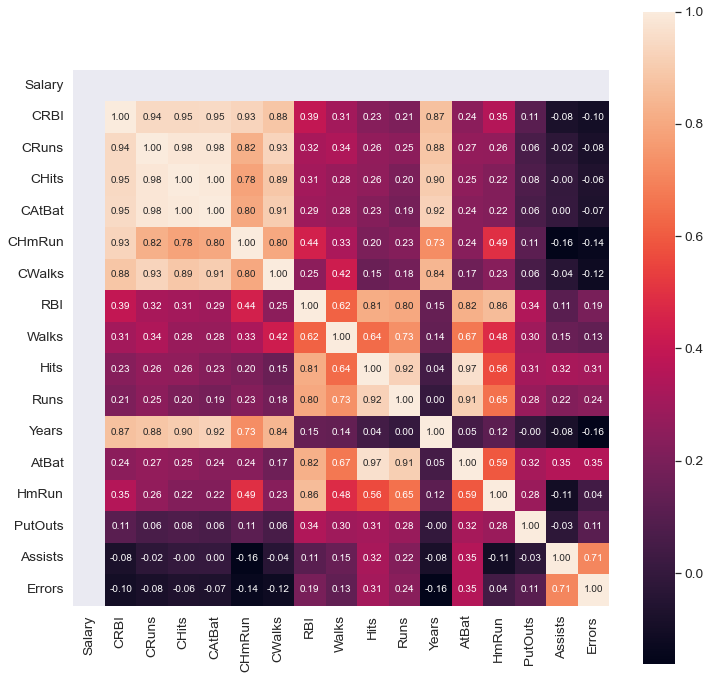

In [17]:
df_corr=df.corr()


k = 17 #number of variables for heatmap
cols = df_corr.nlargest(k, target)[target].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(12,12))    
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>DATA PREPROCESSING & FEATURE ENGINEERING </strong></center></h1>
</div>

<a id="Data_Processing_and_Feature_Engineering"></a>

### Missing_values
<a id="missing_values"></a>

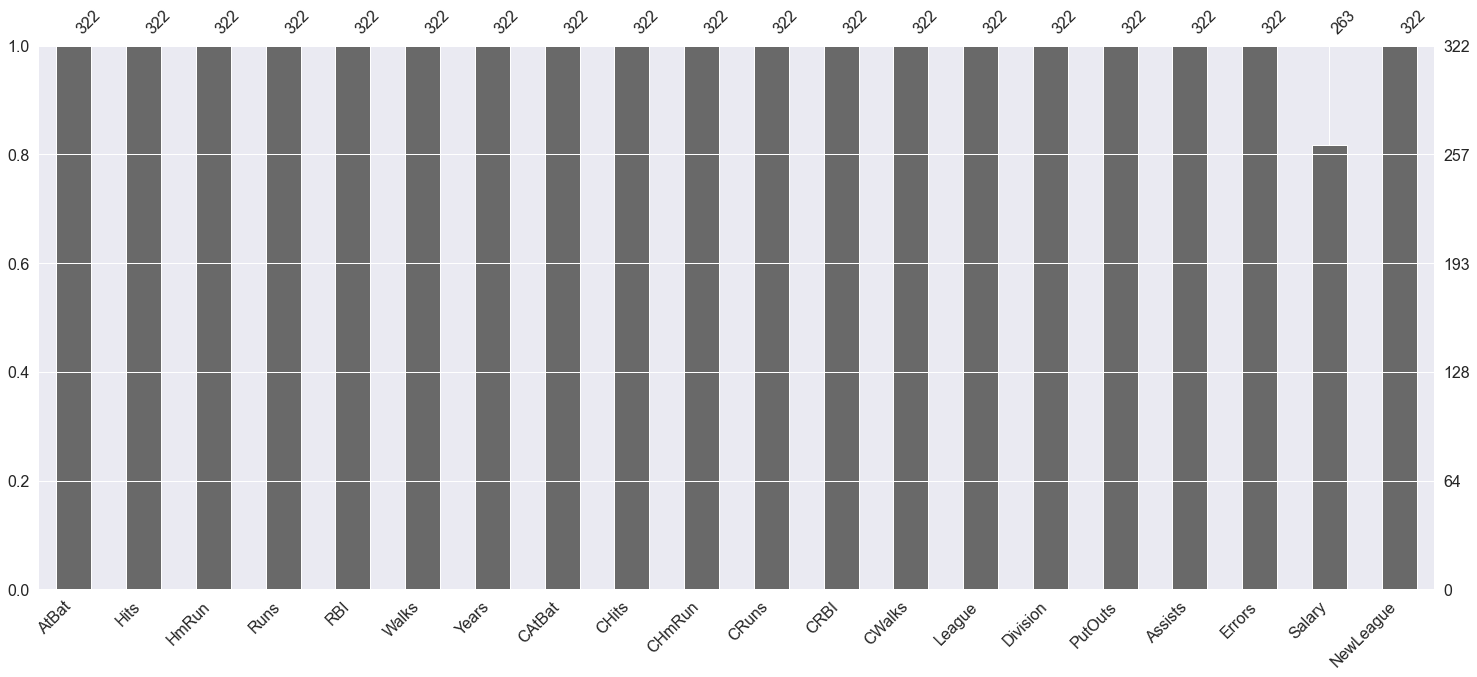

In [18]:
msno.bar(df);

In [19]:
# target variable cannot be NAN
df=df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000,A


### Outliers

<a id="Outliers"></a>

In [20]:
# We omit this because it is small data. Our actions may do more harm than good.

In [21]:
def outlier_thresholds(dataframe, col_name, q1=0.03, q3=0.97):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# outlier_thresholds(df, "colname", q1=0.03, q3=0.97)
#######################################################################################################################
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
#######################################################################################################################    
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

# grab_outliers(df, "tenure")    
#######################################################################################################################    
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# for col in num_cols:
#     new_df = remove_outlier(df, col)    

#######################################################################################################################

def replace_with_thresholds(dataframe, variable):
    #hata: buraya oran orantı ile thresoldları ata. tek sayı ile değiştirme  #!!!!!!!!!!!!!!!!!!!!!!!!!!
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# outlier_thresholds(df, "col_name")
# check_outlier(df, "col_name")
# grab_outliers(df, "col_name", index=True)

# remove_outlier(df, "col_name").shape
# replace_with_thresholds(df, "col_name")
# check_outlier(df, "col_name")

#######################################################################################################################

#############################################
# Missing Values (Eksik Değerler)
#############################################

#############################################
# Eksik Değerlerin Yakalanması/Analiz edilmesi
#############################################
def df_nan_func(df, target):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    df_nan = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
   
    df_nan["isna_mean"]=0
    df_nan["notna_mean"]=0
    for col in df_nan.index:
        if col!=target:
            df_nan.loc[col,"isna_mean"]=df.loc[df[col].isna(),target].mean()
            df_nan.loc[col,"notna_mean"]=df.loc[df[col].notna(),target].mean()
    
    df_nan["isna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["isna_mean"]<df[target].mean()].index,"isna_mean_diff%"]=1-(df_nan[df_nan["isna_mean"]<df[target].mean()]["isna_mean"].values/df[target].mean())
    df_nan.loc[df_nan[df_nan["isna_mean"]>df[target].mean()].index,"isna_mean_diff%"]=(((df_nan[df_nan["isna_mean"]>df[target].mean()]["isna_mean"].values)-df[target].mean())/(1-df[target].mean()))
    
    df_nan["notna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["notna_mean"]<dataframe[target].mean()].index,"notna_mean_diff%"]=1-(df_nan[df_nan["notna_mean"]<dataframe[target].mean()]["notna_mean"].values/dataframe[target].mean())
    df_nan.loc[df_nan[df_nan["notna_mean"]>dataframe[target].mean()].index,"notna_mean_diff%"]=(((df_nan[df_nan["notna_mean"]>dataframe[target].mean()]["notna_mean"].values)-dataframe[target].mean())/(1-dataframe[target].mean()))

    df_nan["na_diff_abs"]=abs(df_nan["isna_mean_diff%"]-df_nan["notna_mean_diff%"])
    return df_nan
# na_cols =df_nan_func(df, target)
# #na_cols


In [22]:
df1=df.copy()

### New Variables
<a id="New_Variables"></a>

In [23]:
df1["FE_HITS_SUCCESS"]= df1['Hits']/df1['AtBat']
df1["FE_HMRUN_ATBAT"] = df1["HmRun"] / df1["AtBat"] * 100
df1["FE_RUN_SUCCESS"]= df1['HmRun']/(df1['Runs'] + 0.00001)
df1["FE_HMRUN_RATE"] = df1["HmRun"] /( df1["CHmRun"] + 0.00001)
df1["FE_WALKS_RATE"] = df1["Walks"] / (df1["CWalks"]+0.00001)
df1["FE_RBI_RATE"] = df1["RBI"] / (df1["CRBI"]+0.00001)
df1["FE_HITS_RATE"] = df1["Hits"] / df1["CHits"]
df1["FE_RUN_RATE"] = df1["Runs"] / df1["CRuns"]
df1["FE_ERROR_MEAN"] = df1["Errors"] / df1["CWalks"] * 100
df1["FE_ERROR_MEAN"] = df1["FE_ERROR_MEAN"].replace(np.inf,0)
df1["FE_ULTIMATE_POWER"] = (df1["CHits"] + df1["CHmRun"] + df1["CRuns"]) / 3

In [24]:
#get_dummies
df_get_dummies=pd.get_dummies(df1[cat_cols_object],drop_first=True)

#drop dummies
df1=df1.drop(cat_cols_object, axis=1)
df1=pd.concat([df1,df_get_dummies],axis=1)

# scaler variables
for col in df1.columns:
    if col not in cat_cols and col !=target:
        df1[col]=df1[col]/df1[col].max()
df1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,FE_HMRUN_RATE,FE_WALKS_RATE,FE_RBI_RATE,FE_HITS_RATE,FE_RUN_RATE,FE_ERROR_MEAN,FE_ULTIMATE_POWER,League_N,Division_W,NewLeague_N
1,0.459,0.340,0.175,0.185,0.314,0.371,0.583,0.245,0.196,0.126,...,0.101,0.104,0.092,0.097,0.075,0.003,0.186,1.000,1.000,1.000
2,0.697,0.546,0.450,0.508,0.595,0.724,0.125,0.116,0.107,0.115,...,0.286,0.289,0.271,0.284,0.295,0.007,0.113,0.000,1.000,0.000
3,0.722,0.592,0.500,0.500,0.645,0.352,0.458,0.400,0.370,0.411,...,0.089,0.105,0.093,0.090,0.079,0.001,0.399,1.000,0.000,1.000
4,0.467,0.366,0.250,0.300,0.347,0.286,0.083,0.028,0.024,0.022,...,0.833,0.909,0.913,0.861,0.812,0.015,0.024,1.000,0.000,1.000
5,0.865,0.710,0.100,0.569,0.421,0.333,0.458,0.314,0.266,0.035,...,0.211,0.180,0.152,0.149,0.148,0.016,0.251,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.723,0.534,0.175,0.500,0.397,0.352,0.208,0.192,0.189,0.058,...,0.219,0.268,0.154,0.158,0.172,0.003,0.185,1.000,0.000,1.000
318,0.716,0.571,0.125,0.585,0.413,0.895,0.500,0.392,0.355,0.071,...,0.128,0.107,0.111,0.090,0.085,0.003,0.372,0.000,0.000,0.000
319,0.691,0.529,0.075,0.469,0.355,0.495,0.250,0.121,0.102,0.013,...,0.429,0.356,0.462,0.291,0.281,0.006,0.100,0.000,1.000,0.000
320,0.834,0.605,0.225,0.654,0.496,0.743,0.333,0.228,0.201,0.177,...,0.093,0.235,0.143,0.168,0.181,0.005,0.216,0.000,0.000,0.000


In [25]:
df_corr=df1.corr()
df_corr[target].sort_values()

FE_RBI_RATE         -0.541
FE_RUN_RATE         -0.527
FE_HITS_RATE        -0.523
FE_WALKS_RATE       -0.510
FE_HMRUN_RATE       -0.487
Division_W          -0.193
FE_ERROR_MEAN       -0.038
League_N            -0.014
Errors              -0.005
NewLeague_N         -0.003
Assists              0.025
FE_RUN_SUCCESS       0.067
FE_HMRUN_ATBAT       0.150
FE_HITS_SUCCESS      0.198
PutOuts              0.300
HmRun                0.343
AtBat                0.395
Years                0.401
Runs                 0.420
Hits                 0.439
Walks                0.444
RBI                  0.449
CWalks               0.490
CHmRun               0.525
CAtBat               0.526
CHits                0.549
FE_ULTIMATE_POWER    0.561
CRuns                0.563
CRBI                 0.567
Salary               1.000
Name: Salary, dtype: float64

In [26]:
df1["FE_POWER"] = 0
for col in df_corr[df_corr[target]>0.3][target].index:
    if col!=target:
        df1["FE_POWER"] += df1[col] 
for col in df_corr[df_corr[target]>-0.19][target].index:
    if col!=target:
        df1["FE_POWER"] -= df1[col]
df1["FE_POWER"]/=df1["FE_POWER"].median()

In [27]:
#############################################
# train_test_split
#############################################
df1.replace([np.inf, -np.inf], 1, inplace=True)
df1=df1.fillna(0)


y = df1[target]
X = df1.drop([ target], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)



<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>4.MODELING </strong></center></h1>
</div>

<a id="Modeling"></a>

In [30]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=2)
    return pred.mean()

def print_evaluate(y_test, predicted):  
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('_____________________________________')
    
def evaluate(y_test, predicted):
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    return mae, mse, rmse, r2_square



def model_evaluation(model,model_0,results_df,pred_df,model_names,model_name=""):
    if model_name=="":
        model_name=str(model).split("(")[0]
    
    if model_name=="Pipeline":
        model_name+="_"+str(model).split("\n")[1].split("'")[1]
    
    if model_name in list(pred_df.columns):
        if (model_name+"_2") not in list(pred_df.columns):
            model_name+="_2"
        elif (model_name+"_3") not in list(pred_df.columns):
            model_name+="_3"  
        else:
            model_name+="_4"
    model_names.append(model_name)
    
    test_pred = model.predict(X_test)
    #train_pred = model.predict(X_train)
    pred_df[model_name]=test_pred
    
#     print("#"*50,model_name,"#"*50)

#     print('Test set evaluation:',model_name,'\n_____________________________________')
#     print_evaluate(y_test, test_pred)

#     print('Train set evaluation:',model_name,'\n_____________________________________')
#     print_evaluate(y_train, train_pred)
    
    
    
    if ("keras" in model_name) or ("Artficial" in model_name):
        results_df_2 = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred), 0]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    else:
        results_df_2 = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred), cross_val(model_0)]], 
                                    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    results_df = results_df.append(results_df_2, ignore_index=True)
    
#     plt.figure(figsize=(8,4))
#     plt.scatter(y_test,test_pred, c= 'brown')
#     plt.xlabel('Y Test')
#     plt.ylabel(model_name)
#     plt.show()

    return results_df,pred_df,model_names
#model_evaluation(rf_reg,results_df)




################################################
# Feature Importance
################################################

def plot_importance(model,model_name, features, num=8, save=False):
    try:
        feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
        plt.figure(figsize=(4, 4))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                         ascending=False)[0:8])
        if model_name:
            plt.title(model_name)
            plt.tight_layout()
            plt.show()
        else:
            plt.title('Features')
            plt.tight_layout()
            plt.show()

        if save:
            plt.savefig('importances.png')
    except:
        pass
        #print(model_name, ": böyle bir özelliğe sahip değildir")


def single_model_scores(model,print_="Yes"):
    #model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
#     train_pred = model.predict(X_train)
    if print_=="Yes":
        print('Test set evaluation:\n_____________________________________')
        print_evaluate(y_test, test_pred)

#     print('Train set evaluation:\n_____________________________________')
#     print_evaluate(y_train, train_pred)

    results_df_single = pd.DataFrame(data=[["model", *evaluate(y_test, test_pred),  cross_val(model)]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    #results_df_single = results_df.append(results_df_single2, ignore_index=True)

    return results_df_single
    



def single_model_test_scores(test_pred,model_name="model"):
    
    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)

   
    results_df_single = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred),  0]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    #results_df_single = results_df.append(results_df_single2, ignore_index=True)

    return results_df_single

# Hyperparameter Optimization with RandomSearchCV
<a id="Hyperparameter_Optimization_with_RandomSearchCV"></a>

In [31]:
iter_factor=4  #change the number of hyperparameter searches of the model
cv=5

In [32]:
################################
# Hyperparameter Optimization with RandomSearchCV 
################################

rf_model = RandomForestRegressor(random_state=17)

rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=30*iter_factor,  # denenecek parametre sayısı
                               cv=cv,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

#rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X_train, y_train)
#print(rf_random.best_params_)
print("RandomForestRegressor")
single_model_scores(rf_random)

RandomForestRegressor
Test set evaluation:
_____________________________________
MAE: 162.4233468188838
MSE: 69659.45535212352
RMSE: 263.93077757647654
R2 Square 0.6686995842300809
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,model,162.423,69659.455,263.931,0.669,0.549


In [33]:
dtree_model_params = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
               }
            
dtree_model = DecisionTreeRegressor()


dtree_model=RandomizedSearchCV(estimator=dtree_model,
                               param_distributions= dtree_model_params,
                               n_iter=100*iter_factor,  # denenecek parametre sayısı
                               cv=cv,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1)


dtree_model.fit(X_train, y_train)
#print(dtree_model.best_params_)
print("DecisionTreeRegressor")
single_model_scores(dtree_model)

DecisionTreeRegressor
Test set evaluation:
_____________________________________
MAE: 201.5649127722243
MSE: 99402.70255098704
RMSE: 315.2819413651645
R2 Square 0.5272406808619743
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,model,201.565,99402.703,315.282,0.527,0.413


In [34]:
knn_params = {'n_neighbors' : [3,4,5,6,7,8,9,10,11,12,13,14,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn_model=KNeighborsRegressor()
knn_model=RandomizedSearchCV(estimator=knn_model,
                               param_distributions= knn_params,
                               n_iter=1000*iter_factor,  # denenecek parametre sayısı
                               cv=cv,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1)


knn_model.fit(X_train, y_train)
#print(knn_model.best_params_)
print("KNeighborsRegressor")
single_model_scores(knn_model)

KNeighborsRegressor
Test set evaluation:
_____________________________________
MAE: 186.54373295454542
MSE: 81962.82474455089
RMSE: 286.2915030952733
R2 Square 0.6101847512547491
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,model,186.544,81962.825,286.292,0.610,0.463


In [35]:
xgb_regxx = xgboost.XGBRegressor()
xgb_param_grid = {'subsample': np.arange(0.1, 1, 0.1),
                  'max_depth': np.arange(2,10,1),
                  'colsample_bytree': np.arange(0.1, 1.05, 0.05),
                  'eta': [0.001,0.01,0.1],
                  'min_child_weight' : np.arange(1,10,1),
                  'n_estimators' : [2000,3000],
                  'reg_alpha' : np.arange(0.1, 1, 0.1)
                 }
xgb_regxx = RandomizedSearchCV(estimator=xgb_regxx,
                               param_distributions=xgb_param_grid,
                               n_iter=30*iter_factor,  # denenecek parametre sayısı
                               cv=cv,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1)

xgb_regxx.fit(X_train, y_train)

# xgb_reg_final = rf_model.set_params(**xgb_regxx.best_params_, random_state=17).fit(X_train, y_train)

#print(xgb_regxx.best_params_)
print("XGBRegressor")
single_model_scores(xgb_regxx)

XGBRegressor
Test set evaluation:
_____________________________________
MAE: 157.93776843400437
MSE: 69322.60279328062
RMSE: 263.291858577664
R2 Square 0.6703016552229373
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,model,157.938,69322.603,263.292,0.670,0.519


In [36]:
GBR_model = ensemble.GradientBoostingRegressor()
GBR_model_params = {'n_estimators': np.arange(100,10000,100), 
                    'max_depth': np.arange(3,20,1), 
                    'min_samples_split': np.arange(2,6,1),
                    'learning_rate': np.arange(0.001,0.1,0.001)
                 }
GBR_model = RandomizedSearchCV(estimator=GBR_model,
                               param_distributions=GBR_model_params,
                               n_iter=30*iter_factor,  # denenecek parametre sayısı
                               cv=cv,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1)

GBR_model.fit(X_train, y_train)

# GBR_model_final = GBR_model.set_params(**GBR_model.best_params_, random_state=17).fit(X_train, y_train)

#print(GBR_model.best_params_)
print("GradientBoostingRegressor")
single_model_scores(GBR_model)

GradientBoostingRegressor
Test set evaluation:
_____________________________________
MAE: 165.25916758959534
MSE: 65587.46115051748
RMSE: 256.1004903363472
R2 Square 0.6880659913486178
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,model,165.259,65587.461,256.100,0.688,0.524


#### Modeling

<a id="lightgbm_model"></a>

In [37]:
#####################################################################################################################################################

# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)

#####################################################################################################################################################
# XGBoost Regressor
xgb_reg = XGBRegressor(**xgb_regxx.best_params_)

#####################################################################################################################################################
# Light Gradient Boosting Regressor
lightgbm_reg = LGBMRegressor()

#####################################################################################################################################################
#GradientBoostingRegressor
GBR_model = ensemble.GradientBoostingRegressor(**GBR_model.best_params_)

#GradientBoostingRegressor
GBR_model2 = ensemble.GradientBoostingRegressor()

#####################################################################################################################################################
#Random Forest Regressor
rf_reg_model = RandomForestRegressor(**rf_random.best_params_, random_state=17)

#####################################################################################################################################################
#Ridge Regression
Ridge_model = Ridge()

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
Ridge_pipeline_model = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

#####################################################################################################################################################

#Support Vector Machine
svm_reg_model = SVR()


# Support Vector Regressor
svm_reg_pipeline_model = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

#####################################################################################################################################################
# KNN
knn_model=KNeighborsRegressor(**knn_model.best_params_)

#####################################################################################################################################################
# dtree
dtree_model = DecisionTreeRegressor(**dtree_model.best_params_)
#####################################################################################################################################################

#Stochastic Gradient Descent
sgd_reg_model = SGDRegressor()

#####################################################################################################################################################

# models=[xgb_reg,xgb_reg2,lightgbm_reg,lightgbm_reg2,GBR_model,GBR_model2,rf_reg_model,rf_reg_model2,rf_reg_model3,
#         svm_reg_model,svm_reg_model2,svm_reg_pipeline_model,knn_model,dtree_model,sgd_reg_model]


models=[xgb_reg,lightgbm_reg,GBR_model,GBR_model2,rf_reg_model,
        svm_reg_model,svm_reg_pipeline_model,knn_model,dtree_model,sgd_reg_model]

models_0=models.copy()

models=[model.fit(X_train, y_train) for model in models]

In [38]:
results_df=pd.DataFrame()
pred_df=pd.DataFrame()
model_names=[]
for i in range(len(models)):
    model=models[i]
    model_0=models_0[i]
    results_df,pred_df,model_names=model_evaluation(model,model_0,results_df,pred_df,model_names)

#### Artficial Neural Network

In [39]:
### Artficial Neural Network
X_train2 = np.array(X_train)
X_test2= np.array(X_test)
y_train2 = np.array(y_train)
y_test2 = np.array(y_test)

keras_model = Sequential()

keras_model.add(Dense(X_train2.shape[1], activation='relu'))
keras_model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(512, activation='relu'))
keras_model.add(Dropout(0.1))
keras_model.add(Dense(1))

keras_model.compile(optimizer=Adam(0.00001), loss='mse')

r = keras_model.fit(X_train2, y_train2,
              validation_data=(X_test2,y_test2),
              batch_size=1,
              verbose=False,
              epochs=75*iter_factor)
results_df,pred_df,model_names=model_evaluation(keras_model,keras_model,
                                                results_df,pred_df,model_names,"Artficial Neural Network")

3/3 [==============================] - 0s 1ms/step


## Feature Engineering2

In [40]:
results_df.set_index('Model', inplace=True)
best_models_R2_Square=results_df.sort_values(["R2 Square"]).iloc[-3:].index
best_models_MAE=results_df.sort_values(["MAE"],ascending=False).iloc[-3:].index
pred_df["Myzc_Regressor"]=0
for col in best_models_R2_Square:
    pred_df["Myzc_Regressor"]+=pred_df[col]
pred_df["Myzc_Regressor"]/=len(best_models_R2_Square)

print("Myzc_Regressor")
best_models_preds_df=single_model_test_scores(pred_df["Myzc_Regressor"],model_name="Myzc_Regressor")
results_df.loc["Myzc_Regressor"]=list(best_models_preds_df.iloc[0].values)[1:]
best_models_preds_df

Myzc_Regressor
Test set evaluation:
_____________________________________
MAE: 152.26744874472308
MSE: 60609.809531807594
RMSE: 246.19059594510833
R2 Square 0.7117397057424546
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Myzc_Regressor,152.267,60609.810,246.191,0.712,0


In [41]:
#results_df.set_index('Model', inplace=True)
#best_models=results_df.sort_values(["MAE"],ascending=False).iloc[-3:].index
pred_df["Myzc_Regressor2"]=0
pred_df["Myzc_Regressor2"]+=(1*pred_df[[best_models_MAE[0]]].T).values[0]
pred_df["Myzc_Regressor2"]+=(0.3*pred_df[[best_models_MAE[1]]].T).values[0]
pred_df["Myzc_Regressor2"]+=(0.2*pred_df[[best_models_MAE[2]]].T).values[0]
pred_df["Myzc_Regressor2"]/=1.5

print("Myzc_Regressor2")
best_models_preds_df=single_model_test_scores(pred_df["Myzc_Regressor2"],model_name="Myzc_Regressor2")
results_df.loc["Myzc_Regressor2"]=list(best_models_preds_df.iloc[0].values)[1:]
best_models_preds_df

Myzc_Regressor2
Test set evaluation:
_____________________________________
MAE: 154.5903399285779
MSE: 65114.08937245983
RMSE: 255.17462525192397
R2 Square 0.6903173478384368
_____________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Myzc_Regressor2,154.590,65114.089,255.175,0.690,0


In [42]:
results_df=results_df.sort_values("MAE",ascending=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
Myzc_Regressor,152.267,60609.810,246.191,0.712,0.000
GradientBoostingRegressor_2,153.032,61287.865,247.564,0.709,0.562
Myzc_Regressor2,154.590,65114.089,255.175,0.690,0.000
XGBRegressor,157.938,69322.603,263.292,0.670,0.574
RandomForestRegressor,162.423,69659.455,263.931,0.669,0.552
GradientBoostingRegressor,162.983,64509.265,253.987,0.693,0.562
LGBMRegressor,178.719,71969.685,268.272,0.658,0.524
KNeighborsRegressor,186.544,81962.825,286.292,0.610,0.448
SGDRegressor,193.945,79493.563,281.946,0.622,0.448


Myzc_Regressor _____Test set evaluation:
_____________________________________
MAE: 152.26744874472308
MSE: 60609.809531807594
RMSE: 246.19059594510833
R2 Square 0.7117397057424546
_____________________________________


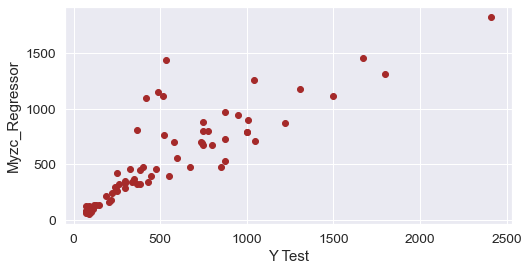

##############################################################################################################
GradientBoostingRegressor_2 _____Test set evaluation:
_____________________________________
MAE: 153.0322271687699
MSE: 61287.86460342738
RMSE: 247.56385964721784
R2 Square 0.7085148753729521
_____________________________________


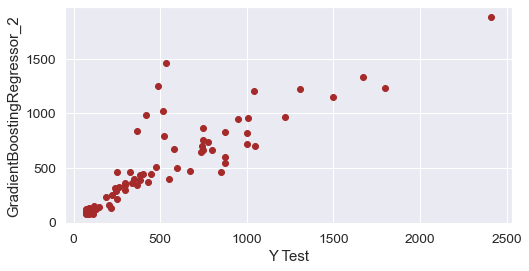

##############################################################################################################
Myzc_Regressor2 _____Test set evaluation:
_____________________________________
MAE: 154.5903399285779
MSE: 65114.08937245983
RMSE: 255.17462525192397
R2 Square 0.6903173478384368
_____________________________________


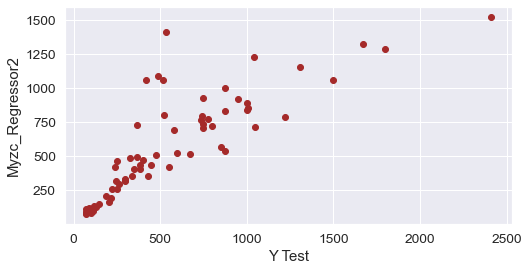

##############################################################################################################
XGBRegressor _____Test set evaluation:
_____________________________________
MAE: 157.93776843400437
MSE: 69322.60279328062
RMSE: 263.291858577664
R2 Square 0.6703016552229373
_____________________________________


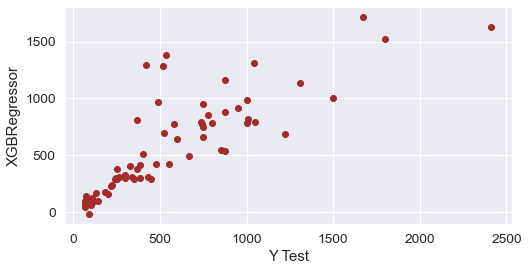

##############################################################################################################


In [43]:
for i in range(len(results_df.index)):
    model=results_df.index[i]
    if model in results_df.index[:4]:
        test_pred=pred_df[model]
        print(model,'_____Test set evaluation:\n_____________________________________')
        print_evaluate(y_test, test_pred)
        plt.figure(figsize=(8,4))
        plt.scatter(y_test,test_pred, c= 'brown')
        plt.xlabel('Y Test')
        plt.ylabel(model)
        plt.show()
        print('#'*110)
    

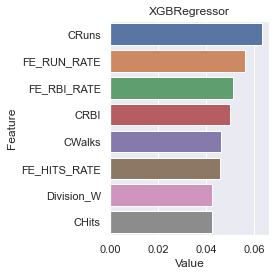

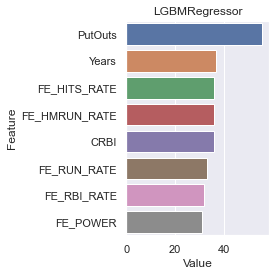

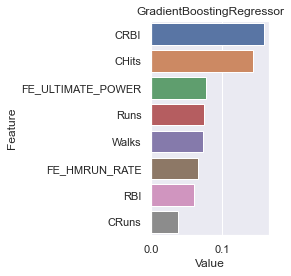

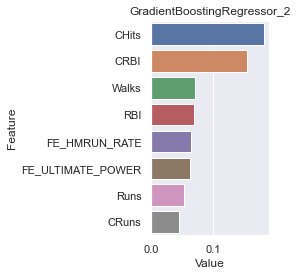

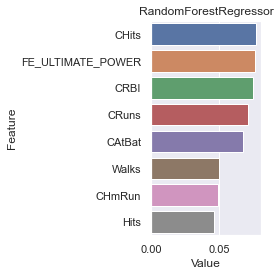

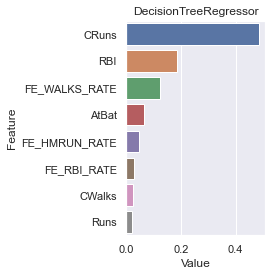

In [44]:
for i,model in enumerate(models):
    model_name=model_names[i]
    plot_importance(model,model_name, X)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>SUMMARY & RESULTS </strong></center></h1>
</div>

<a id="Summary"></a>

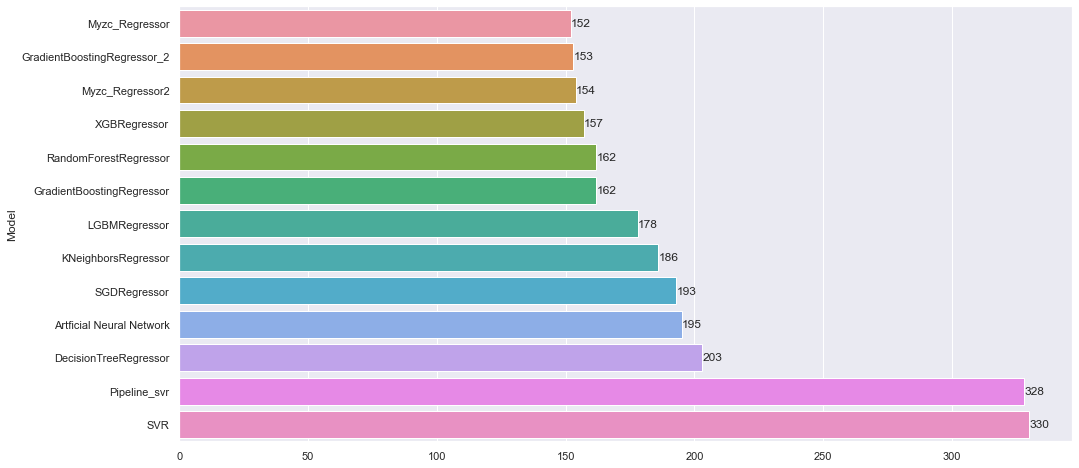

In [45]:
results_dfx=results_df.sort_values("MAE",ascending=True)
#results_dfx['MAE'].plot(kind='barh', figsize=(12, 8))
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=results_dfx['MAE'].astype(int).values,y=results_dfx['MAE'].index, data=results_dfx[['MAE']]);
for container in ax.containers:
    ax.bar_label(container)

----------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------

**Working with very small data made model training difficult.**

**However, we increased our success rate considerably as a result of feature engineering and hyperparameter tunning.**

----------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------

![](https://amessagewithabottle.com/wp-content/uploads/2019/09/moneyball-1024x550.jpg)

I hope all of you did gain some insights to Machine Learning. Some other my notebooks for Machine Learning are: 
1) https://www.kaggle.com/code/mustafayazici/house-price-eda-ml-visualization

2) https://www.kaggle.com/code/mustafayazici/data-cleaning-prearation-feature-engineering

3) https://www.kaggle.com/mustafayazici/code

4) https://github.com/Mustafa-YAZICI?tab=repositories


>>**Thanks a lot for having a look at this notebook.** 

>> **If you found this notebook useful,  Do Upvote**